In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, classification_report
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [2]:
#1 Загрузите файл HR.csv в pandas dataframe
data = pd.read_csv('/content/sample_data/HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
mycolumns = [column for column in data]
df = data[mycolumns[:8]]
data_stat = pd.DataFrame()
for col in mycolumns[:8]:
  data_stat['mean'] = df.mean()
  data_stat['median'] = df.median()
  data_stat['min'] = df.min()
  data_stat['max'] = df.max()
  data_stat['std'] = df.std()
data_stat.head(8)

,mean,median,min,max,std
satisfaction_level,0.612834,0.64,0.09,1.0,0.248631
last_evaluation,0.716102,0.72,0.36,1.0,0.171169
number_project,3.803054,4.00,2.00,7.0,1.232592
average_montly_hours,201.050337,200.00,96.00,310.0,49.943099
time_spend_company,3.498233,3.00,2.00,10.0,1.460136
Work_accident,0.144610,0.00,0.00,1.0,0.351719
left,0.238083,0.00,0.00,1.0,0.425924
promotion_last_5years,0.021268,0.00,0.00,1.0,0.144281


In [6]:
# моды
data.mode().iloc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

In [7]:
# моды с количеством повторений
m = stats.mode(data, keepdims=False)
md = m.mode.tolist()
cnt = m.count.tolist()
df_mode = pd.DataFrame(md, columns = ['mode'], index = mycolumns)
df_mode['count'] = cnt
df_mode

<ipython-input-7-d3324072615a>:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  m = stats.mode(data, keepdims=False)


,mode,count
satisfaction_level,0.1,358
last_evaluation,0.55,358
number_project,4,4365
average_montly_hours,135,153
time_spend_company,3,6443
Work_accident,0,12830
left,0,11428
promotion_last_5years,0,14680
department,sales,4140
salary,low,7316


In [8]:
#3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.
data_corr = df.corr()
data_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

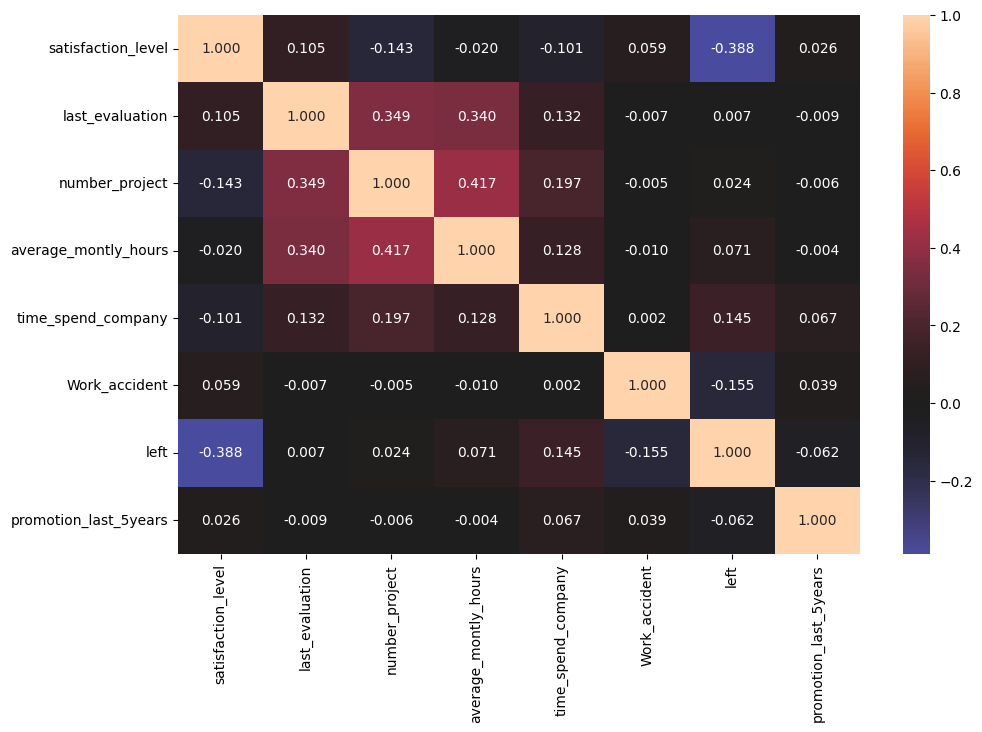

In [9]:
sns.heatmap(data_corr, annot=True, fmt=".3f", center=0)

In [10]:
a = data_corr.abs().min().idxmin()
b= data_corr[a].abs().idxmin()
print('минимальная корреляция между параметрами ', a , ' и ', b)

минимальная корреляция между параметрами  time_spend_company  и  Work_accident


In [11]:
data_corr_0 = data_corr.copy()
data_corr_0.replace(1.0,0.0,inplace=True)
c = data_corr_0.abs().max().idxmax()
d = data_corr_0[c].abs().idxmax()
print('максимальная корреляция между параметрами ', c , ' и ', d)

максимальная корреляция между параметрами  number_project  и  average_montly_hours


In [13]:
#4 Рассчитайте сколько сотрудников работает в каждом департаменте
print('Распределение сотрудников по департаментам')
data_dep = data.groupby(['department'])['department'].count().sort_values(ascending=False)
print(data_dep)

Распределение сотрудников по департаментам
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


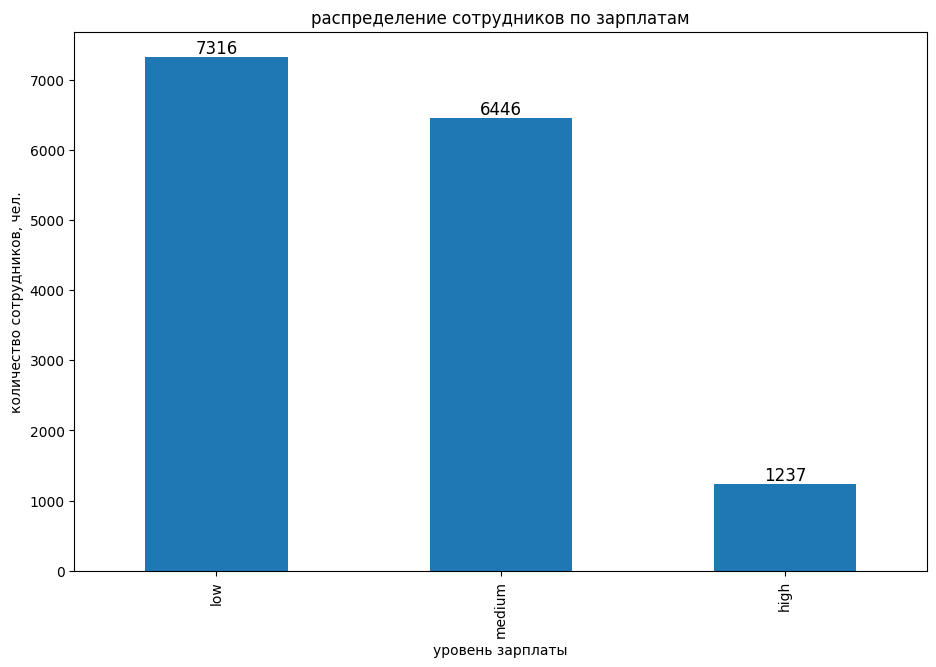

In [14]:
#5 Показать распределение сотрудников по зарплатам.
dt_salary = data.groupby(['salary'])['salary'].count().sort_values(ascending=False)
dt_salary.plot(kind='bar', title='распределение сотрудников по зарплатам',
                             xlabel='уровень зарплаты',
                             ylabel='количество сотрудников, чел.')
for i, val in enumerate(dt_salary.values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

<Axes: title={'center': 'распределение уровня зарплат по департаментам'}, xlabel='департаменты', ylabel='Количество, чел.'>

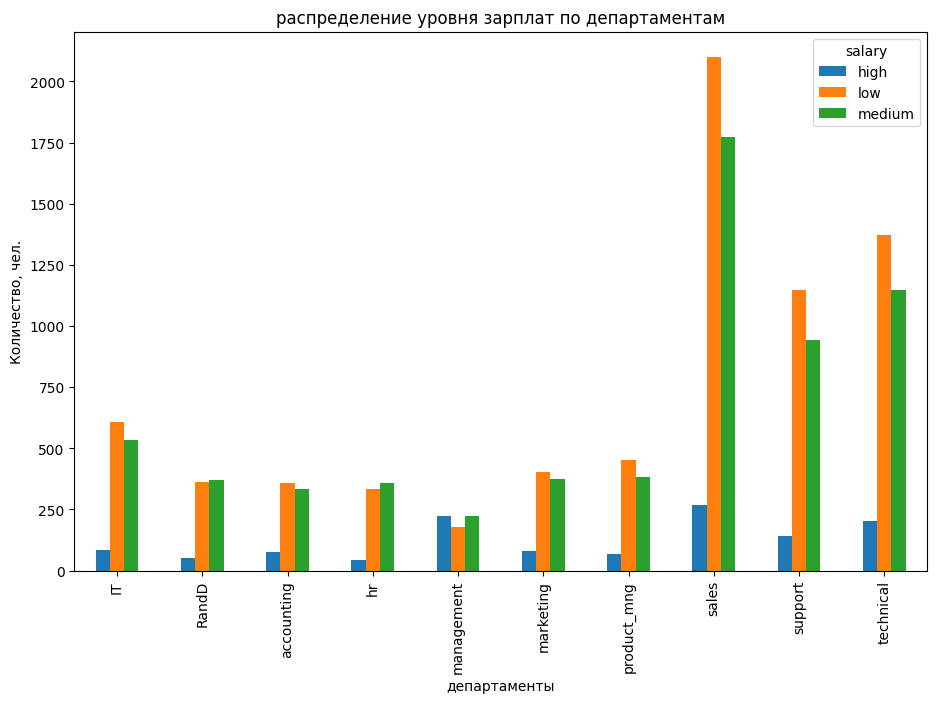

In [15]:
#5 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
dt_salary1 = data.groupby(['department','salary']).agg({'department': ['count']}).reset_index()
dt_salary1.columns = ['department', 'salary', 'count']
df = dt_salary1.pivot(
    index='department',
    columns='salary',
    values='count'
)
df.plot(kind='bar',title='распределение уровня зарплат по департаментам',
                             xlabel='департаменты',
                             ylabel='Количество, чел.')

In [16]:
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
dt_salary2 = data.groupby(['salary']).agg({'average_montly_hours': ['mean']})
dt_salary2.columns = ['mean_hours']
dt_salary2.sort_values(by='mean_hours')

,mean_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Text(0.5, 1.0, 'Распределение времени, которе работники проводят на работе в мес.')

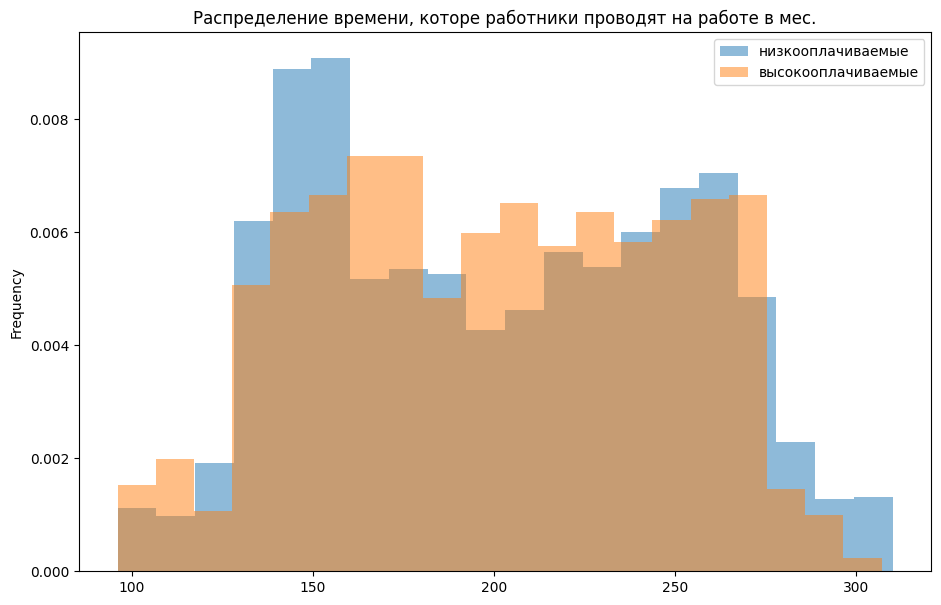

In [17]:
data[data['salary']=='low']['average_montly_hours'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label = 'низкооплачиваемые')
data[data['salary']=='high']['average_montly_hours'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label = 'высокооплачиваемые')
plt.legend(loc='upper right')
plt.title('Распределение времени, которе работники проводят на работе в мес.')

Распределение данных - не нормальное в обеих выборках, значит нужно применять непераметрические тесты.
Тест Манна-Уитни

Гипотеза

H0: Распределения одинаковы.
H1: Распределения различаются.

In [18]:
data_low = data[data['salary']=='low']['average_montly_hours']
data_high = data[data['salary']=='high']['average_montly_hours']

stat, p = st.mannwhitneyu(data_low, data_high)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Итого имеем: ни сравнение средних, ни визуально ни по тестам гипотеза, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом <b>не подтверждается!</b>

In [19]:
#8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет
# Средняя степень удовлетворенности
# Среднее количество проектов
indicators = data[['promotion_last_5years','satisfaction_level','number_project','left']].groupby(['left']).mean()
indicators.rename(index={1:'уволились', 0:'не уволилились'}, inplace= True )
indicators.columns = ['Доля с повышением за последние 5 лет', 'Средняя степень удовлетворенности', 'Среднее количество проектов']
indicators

,Доля с повышением за последние 5 лет,Средняя степень удовлетворенности,Среднее количество проектов
left,,,
не уволилились,0.026251,0.666810,3.786664
уволились,0.005321,0.440098,3.855503


In [20]:
#9 Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки
m_data = data[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'promotion_last_5years']]
m_target = data['left'].to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(m_data, m_target, random_state=999)

In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [23]:
# оценка
report = classification_report(y_test, lda.predict(X_test), target_names=['Non-left', 'left'])
print(report)

              precision    recall  f1-score   support

    Non-left       0.81      0.91      0.86      2905
        left       0.47      0.27      0.35       845

    accuracy                           0.77      3750
   macro avg       0.64      0.59      0.60      3750
weighted avg       0.74      0.77      0.74      3750



Так-себе точность для уволенных...
А что, если оставить только те параметры, корреляция которых больше 10% (относительно уволен/неуволен)?

In [24]:
m_data = data[['satisfaction_level',	'time_spend_company',	'Work_accident']]
X_train, X_test, y_train, y_test = train_test_split(m_data, m_target, random_state=999)
lda.fit(X_train, y_train)
report = classification_report(y_test, lda.predict(X_test), target_names=['Non-left', 'left'])
print(report)

              precision    recall  f1-score   support

    Non-left       0.81      0.91      0.86      2905
        left       0.47      0.27      0.34       845

    accuracy                           0.77      3750
   macro avg       0.64      0.59      0.60      3750
weighted avg       0.73      0.77      0.74      3750



Практически ни чего не поменялось ( а параметров взяли только 3!)